<center><img src="https://semcomp-epcc-unsa.github.io/assets/images/cslogos/logo-only.png" width="120">


$\tiny{Universidad \ Nacional \ de \ San \ Agustín \ de \ Arequipa \\
Escuela \ Profesional \ de \ Ciencia \ de \ la \ Computación  }$

---


#<center>$Laboratorio \ 02$

**Curso:** *Computacón Gráfica*

**Tema:** *Introducción a OpenCV*

**Profesora:** *Paccotacya Yanque, Rosa Yuliana Gabriela*

**Alumno:** *Nifla Llallacachi, Manuel Angel* \\



---



In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

In [3]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [4]:
URL = r"https://www.dropbox.com/s/rys6f1vprily2bg/opencv_bootcamp_assets_NB2.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB2.zip")

# Download if assest ZIP does not exists.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)



---


#*CARGANDO IMAGEN*

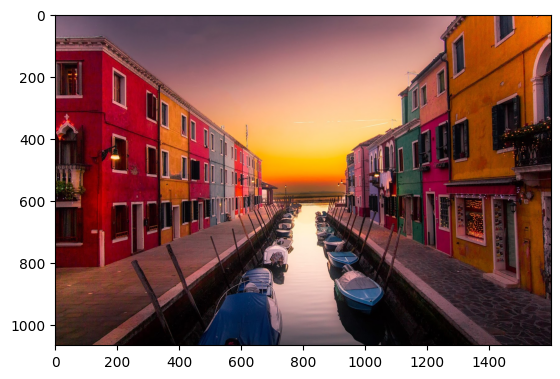

In [5]:
cb_img = cv2.imread("Venecia.jpg")

img = cv2.cvtColor(cb_img, cv2.COLOR_BGR2RGB)
plt.imshow(img)



---
#*A. FUNCION QUE CAMBIE REGIONES DE LA IMAGEN*


In [11]:
def intercambiar(img, cantidad_regiones, orden):
    # Obteniendo las dimensiones de la imagen.
    alto, ancho, _ = img.shape

    # Verificando que la cantidad de regiones sea válida.
    if cantidad_regiones[0] * cantidad_regiones[1] != len(orden):
        print("Error: La cantidad de regiones no coincide con el tamaño del orden especificado.")
        return None

    # Calcular el tamaño de cada región
    region_alto = alto // cantidad_regiones[0]
    region_ancho = ancho // cantidad_regiones[1]

    # Nueva imagen para almacenar el resultado
    nueva_img = np.zeros_like(img)

    # Iterar sobre las regiones y reorganizarlas según el orden especificado
    for i, indice in enumerate(orden):
        fila = i // cantidad_regiones[1]
        columna = i % cantidad_regiones[1]

        # Coordenadas de la región en la imagen original
        y_inicio = fila * region_alto
        y_fin = y_inicio + region_alto
        x_inicio = columna * region_ancho
        x_fin = x_inicio + region_ancho

        # Coordenadas de la región en la nueva imagen
        nueva_y_inicio = (indice-1) // cantidad_regiones[1] * region_alto
        nueva_y_fin = nueva_y_inicio + region_alto
        nueva_x_inicio = (indice-1) % cantidad_regiones[1] * region_ancho
        nueva_x_fin = nueva_x_inicio + region_ancho

        # Se copia la región de la imagen original a la nueva imagen
        nueva_img[nueva_y_inicio:nueva_y_fin, nueva_x_inicio:nueva_x_fin] = img[y_inicio:y_fin, x_inicio:x_fin]

    return nueva_img



---

#*B. USANDO LA FUNCION*

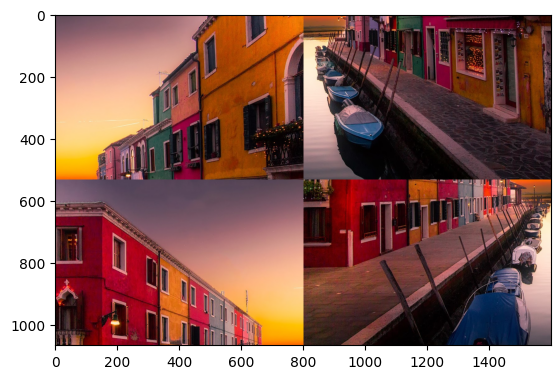

In [13]:
imagen_original = cb_img
cantidad_regiones = (2, 2)
orden = [3, 1, 4, 2]

nueva_imagen = intercambiar(imagen_original, cantidad_regiones, orden)

# Mostrar la nueva imagen
img = cv2.cvtColor(nueva_imagen, cv2.COLOR_BGR2RGB)
plt.imshow(img)